# Image alignment

-   **Theorie:** Homography

## Libraries

In [2]:
%matplotlib inline

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

## Images dataset

In [4]:
form = cv2.imread("./Images/form.jpg")
form = cv2.cvtColor(form, cv2.COLOR_BGR2RGB)
scanned_form = cv2.imread("./Images/scanned-form.jpg")
scanned_form = cv2.cvtColor(scanned_form, cv2.COLOR_BGR2RGB)

In [5]:
def plotImages(imgArray, flag):
    plt.figure(figsize=(16,5))
    l = len(imgArray)
    for i in range(l):
        plt.subplot(1, l, i+1)
        if flag == 'gray':
            plt.imshow(imgArray[i], cmap='gray')
        else:
            plt.imshow(imgArray[i])
        plt.axis('off')
    plt.show()

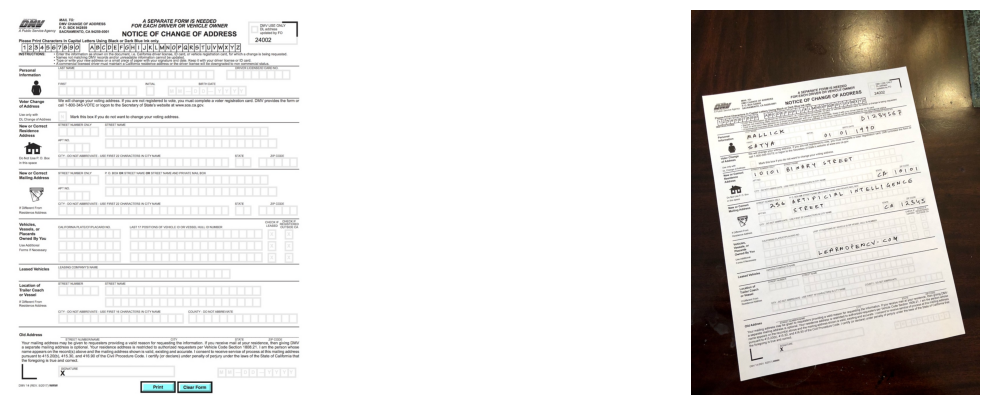

In [9]:
plotImages([form, scanned_form], _)

## Feature scanning

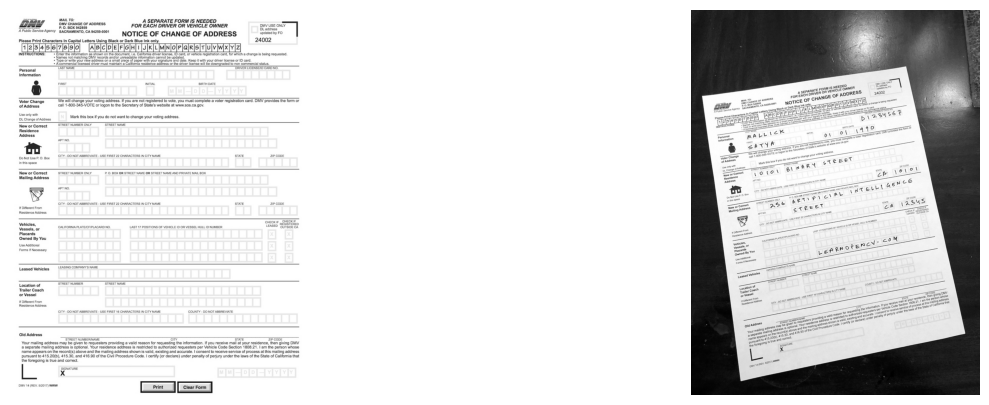

In [6]:
form_gray = cv2.cvtColor(form, cv2.COLOR_RGB2GRAY)
scanned_form_gray = cv2.cvtColor(scanned_form, cv2.COLOR_RGB2GRAY)

plotImages([form_gray, scanned_form_gray], "gray")

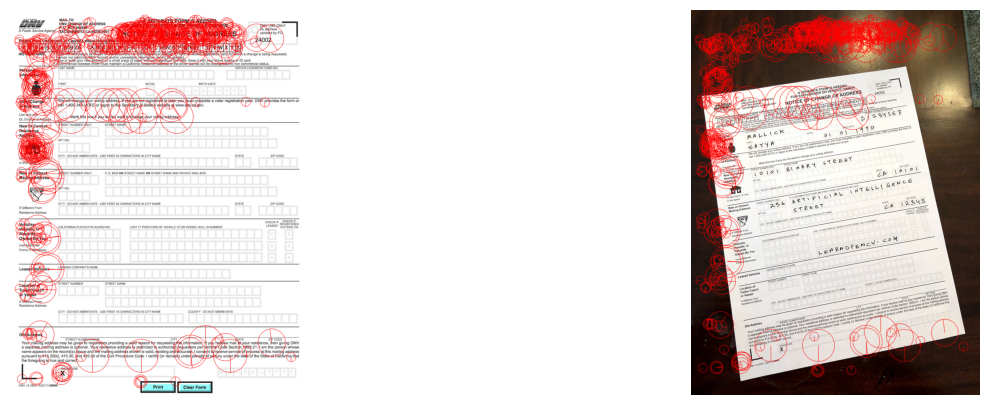

In [7]:
MAX_FEATURES = 500
orb = cv2.ORB_create(MAX_FEATURES)
keyPoints1, descriptors1 = orb.detectAndCompute(form_gray, None)
keyPoints2, descriptors2 = orb.detectAndCompute(scanned_form_gray, None)

form_display = cv2.drawKeypoints(form, keyPoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scanned_form_display = cv2.drawKeypoints(scanned_form, keyPoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plotImages([form_display, scanned_form_display], _)

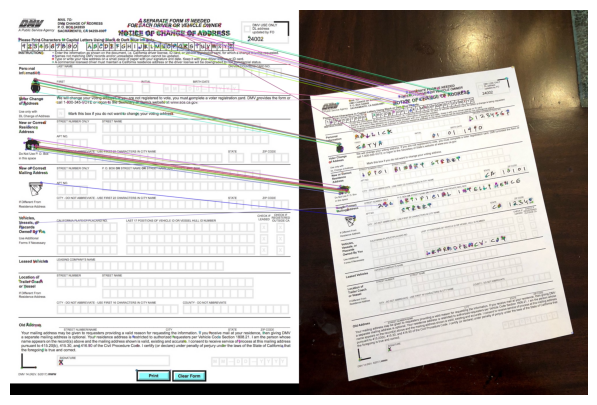

In [8]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = list(matcher.match(descriptors1, descriptors2, None))

matches.sort(key=lambda x: x.distance, reverse=False)

goodMatches = int(len(matches)*0.1)
matches = matches[:goodMatches]

img_matches = cv2.drawMatches(form, keyPoints1, scanned_form, keyPoints2, matches, None)
plotImages([img_matches],_)









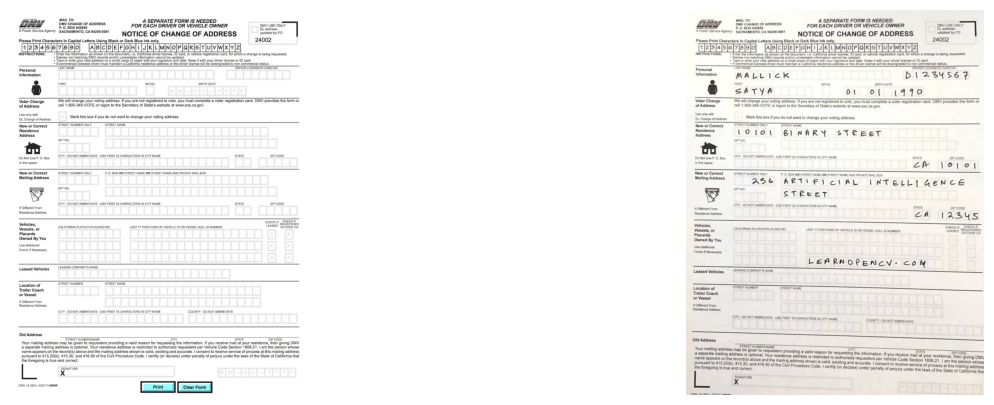

In [11]:
# Extract location of good matches
p1 = np.zeros((len(matches), 2), dtype=np.float32)
p2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    p1[i, :] = keyPoints1[match.queryIdx].pt
    p2[i, :] = keyPoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(p2, p1, cv2.RANSAC)

# Use homography to warp image
height, width, channels = form.shape
scanned_form_reg = cv2.warpPerspective(scanned_form, h, (width, height))

# Display results
plotImages([form, scanned_form_reg], _)